<a href="https://colab.research.google.com/github/JoaoVicenteRubia/Data_Science/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Título e Introdução

# Análise de Dados do Dataset "Wine Quality"

## Introdução
O projeto tem como objetivo explorar e compreender o conjunto de dados "Wine Quality", disponível no repositório da UCI Machine Learning Repository. Este dataset contém informações sobre propriedades físico-químicas e a qualidade de diferentes amostras de vinhos tintos e brancos.

## Contexto do Problema
A indústria vinícola enfrenta constantes desafios para garantir e melhorar a qualidade de seus produtos. Identificar os fatores que mais influenciam na percepção de qualidade é essencial para otimizar processos de produção, reduzir custos e garantir a satisfação dos consumidores.

Este estudo busca responder às seguintes perguntas:
- Quais características químicas e sensoriais têm maior impacto na qualidade do vinho?
- É possível criar um modelo para prever a qualidade com base nas variáveis disponíveis?
- Como os dados podem orientar decisões estratégicas no processo produtivo?

## Objetivos do Projeto
1. **Análise do Problema:** Entender o contexto do negócio e identificar os fatores que impactam na qualidade do vinho.
2. **Exploração de Dados:** Realizar uma análise exploratória (EDA) para identificar padrões e relações entre variáveis.
3. **Redução de Dimensionalidade:** Aplicar a técnica de Análise de Componentes Principais (PCA) para priorizar variáveis mais relevantes.
4. **Insights Estratégicos:** Gerar um dataset final filtrado e apresentar conclusões que possam ser aplicadas ao processo produtivo.

Este estudo combina técnicas de análise de dados e machine learning para fornecer insights acionáveis ao problema.

---


#Configuração inicial:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

#Data Wrangling:

In [8]:
print("Valores nulos por coluna:")
print(data.isnull().sum())

Valores nulos por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
print("\nNúmero de linhas duplicadas:")
print(data.duplicated().sum())


Número de linhas duplicadas:
240


In [10]:
data = data.drop_duplicates()

In [11]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

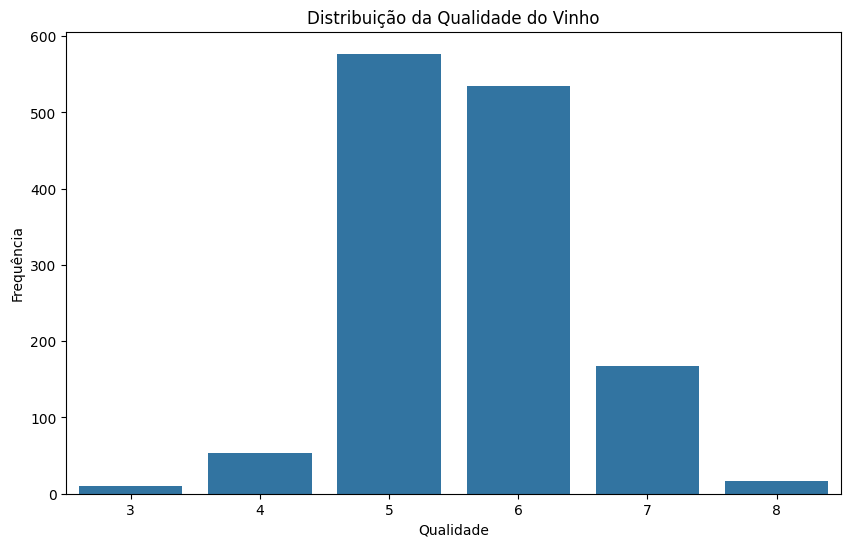

In [12]:
sns.countplot(x='quality', data=data)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.show()

In [13]:
print(data.shape)

(1359, 12)


# Análise Exploratória de Dados

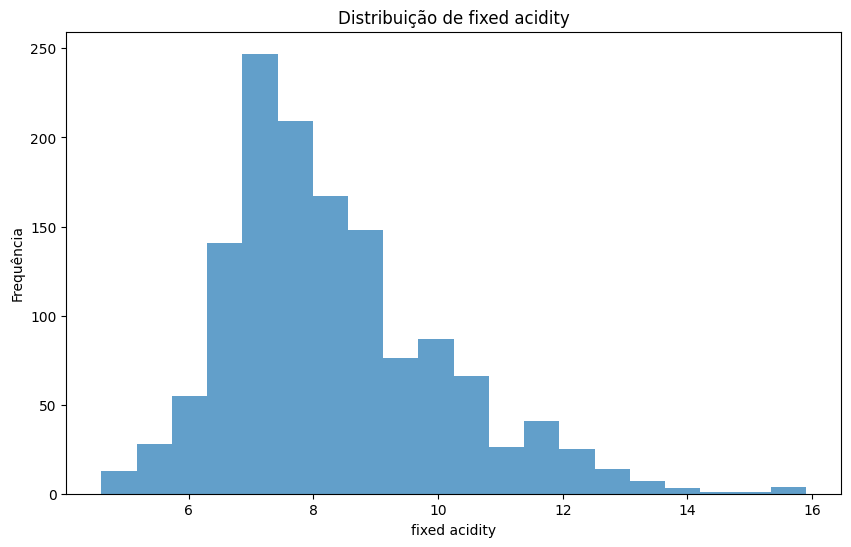

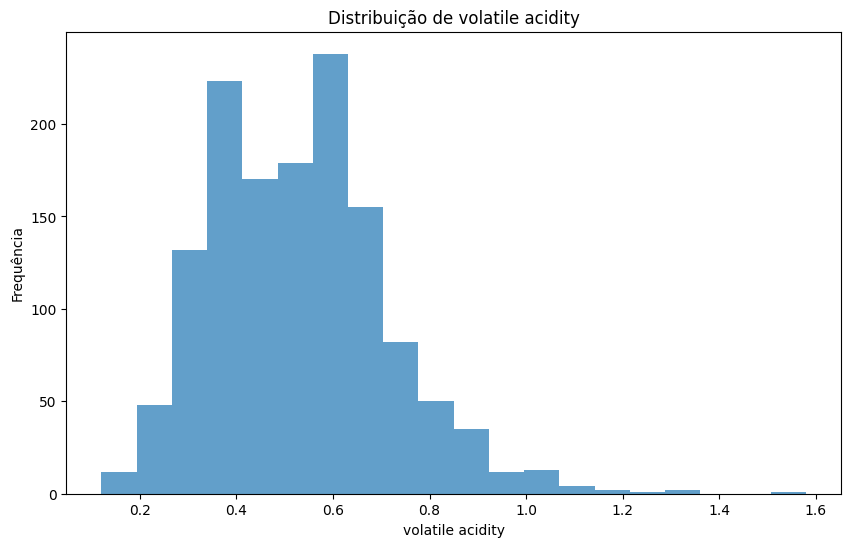

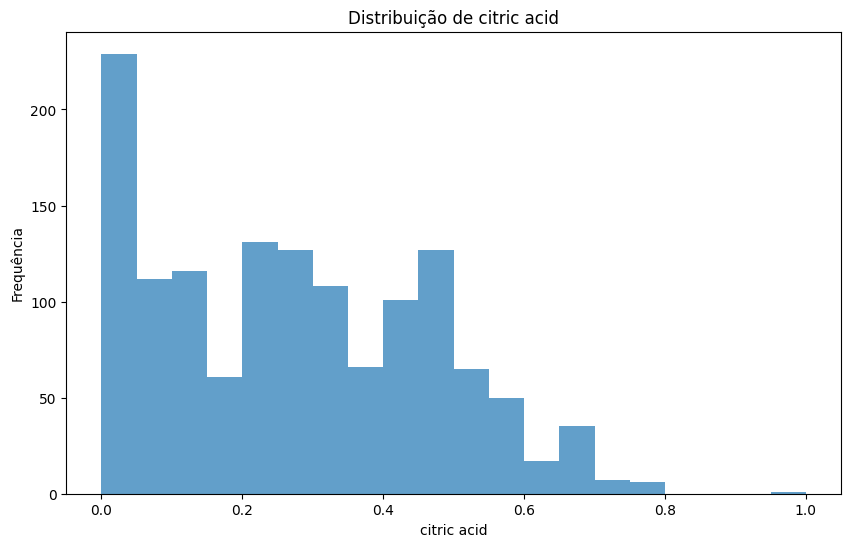

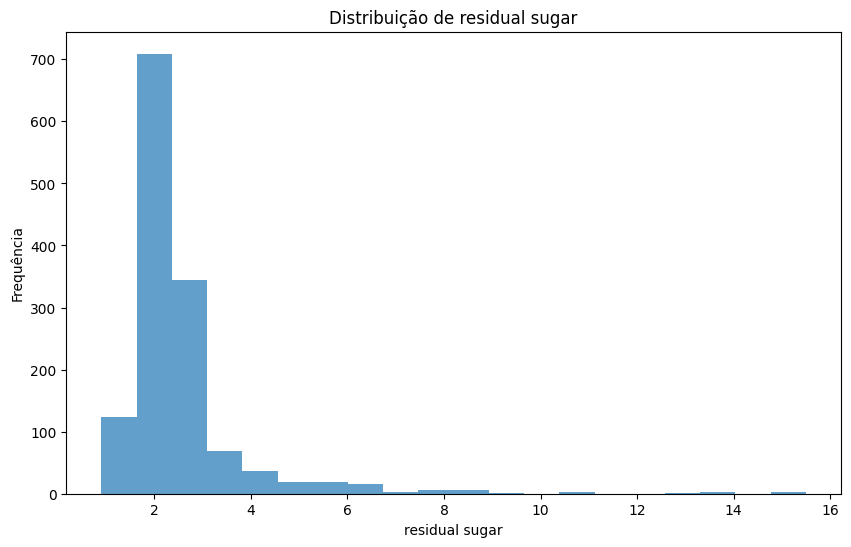

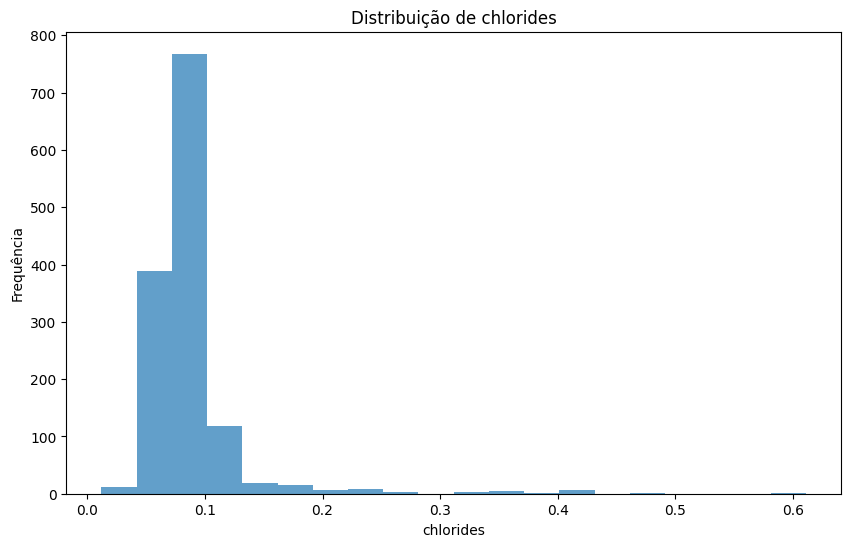

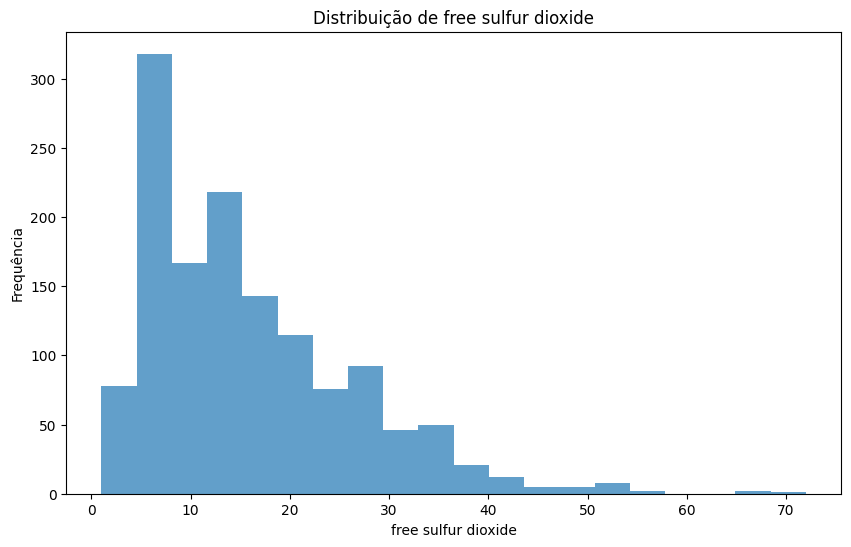

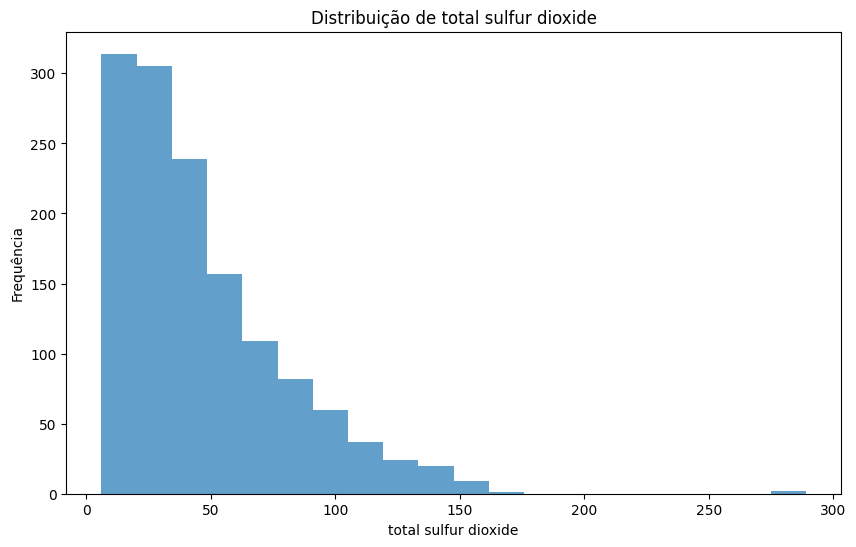

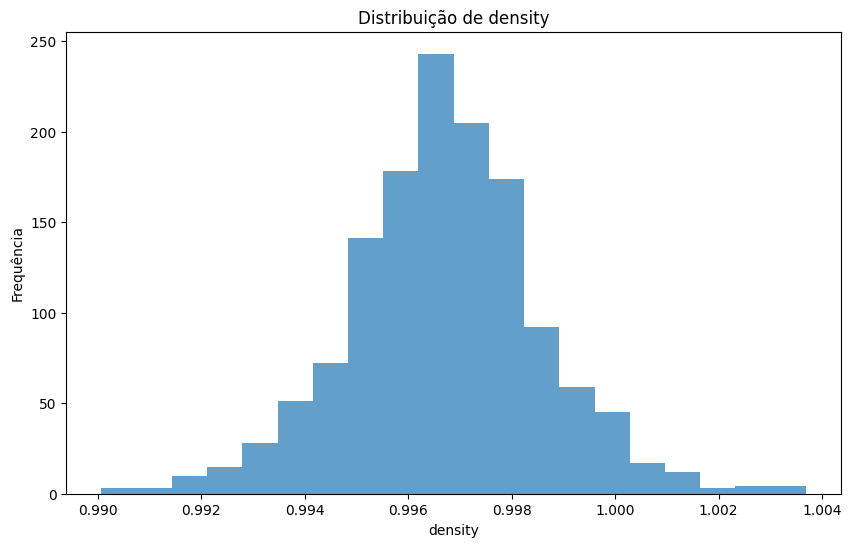

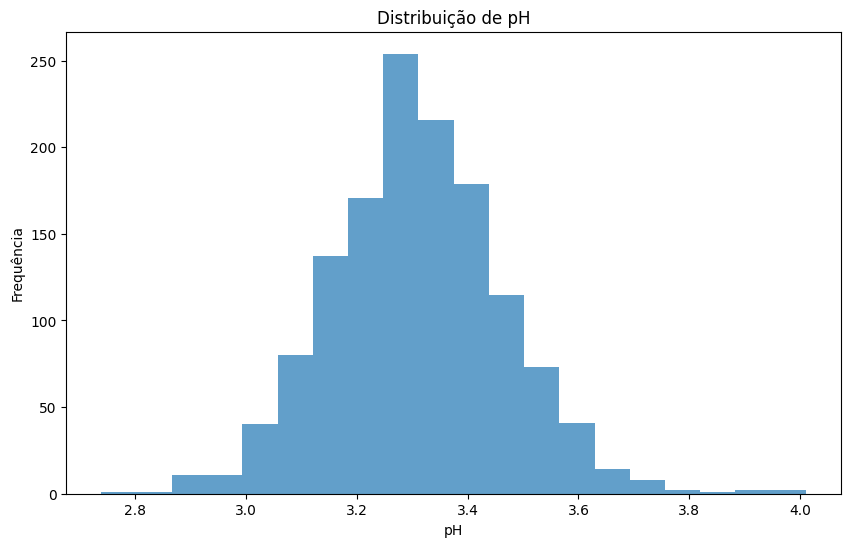

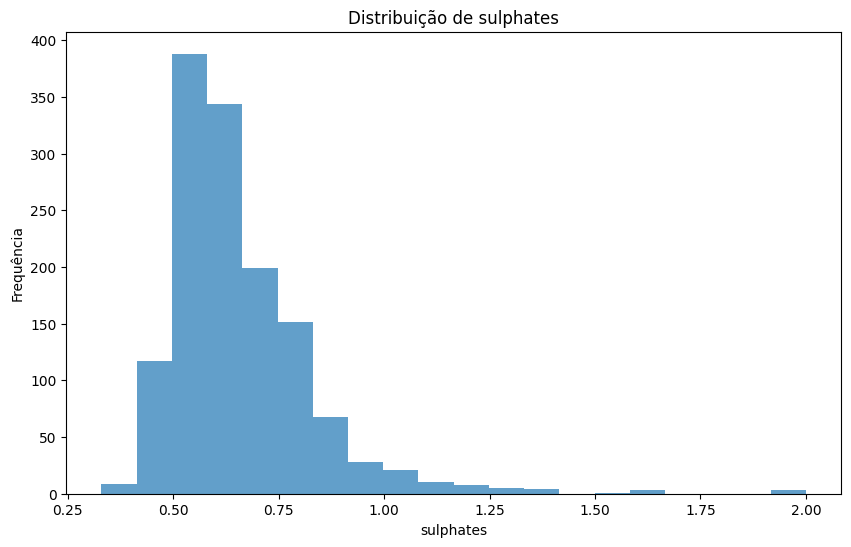

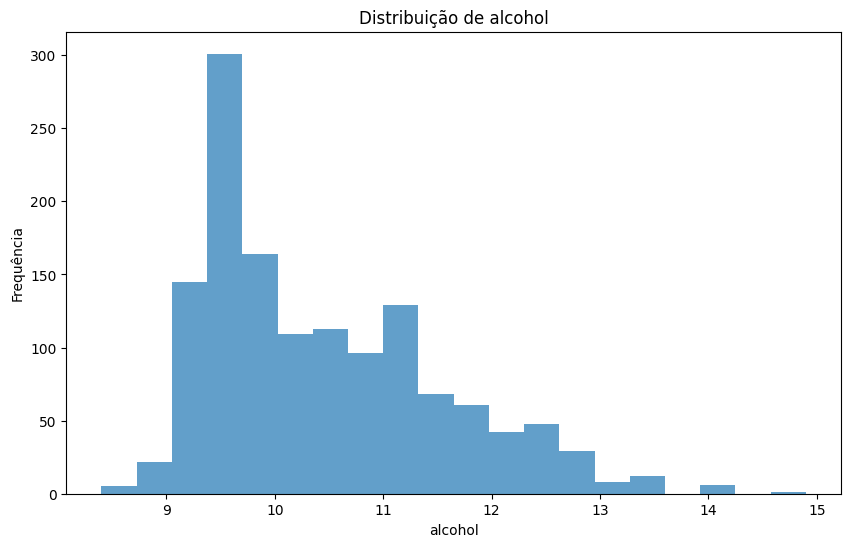

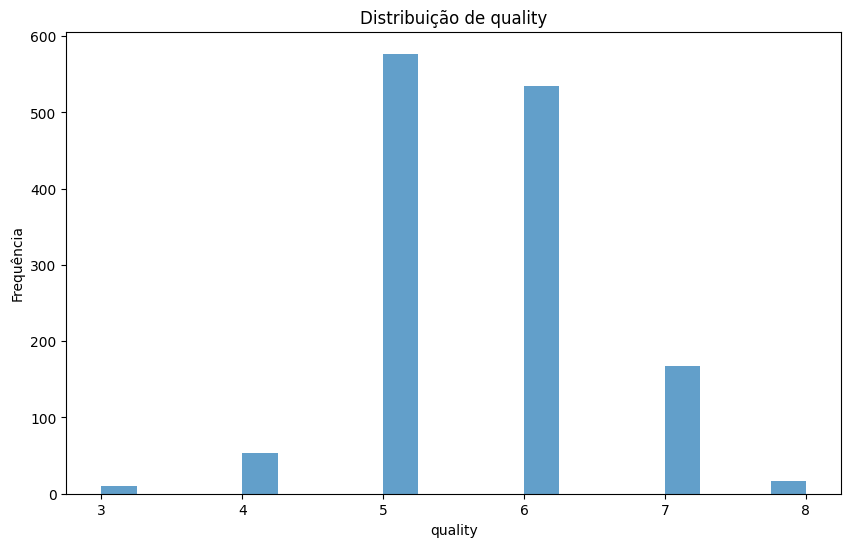

In [14]:
for col in data.columns:
    plt.hist(data[col], bins=20, alpha=0.7)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

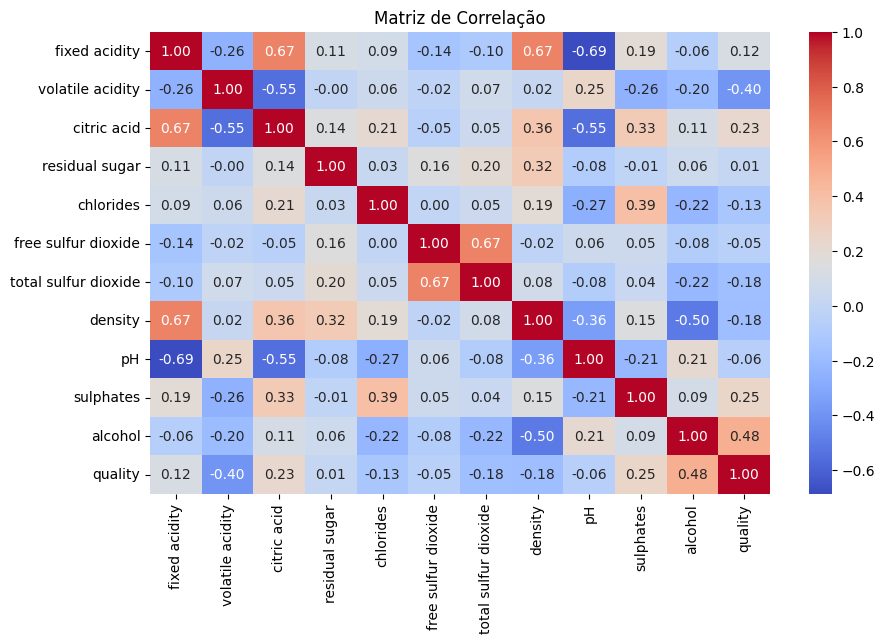

In [15]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

História dos Dados e Conclusão

Com base na análise exploratória dos dados, observamos que variáveis como 'fixed acidity', 'alcohol' e 'volatile acidity'
são altamente correlacionadas com a qualidade do vinho.

Próximos Passos:
1. Construção de modelos preditivos para estimar a qualidade do vinho com base nas variáveis.
2. Implementação de técnicas de feature engineering para melhorar a performance dos modelos.

# Entrega 2


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
target = 'quality'
X = data.drop(columns=[target])
y = data[target]

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Logistic Regression

In [51]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [50]:
acc_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Random Forest

In [53]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [54]:
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#XGBoost

In [61]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [62]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Resultados

In [66]:
resultados = {
    'Logistic Regression': {
        'Accuracy': acc_logistic,
        'Classification Report': report_logistic,
        'Confusion Matrix': cm_logistic
    },
    'Random Forest': {
        'Accuracy': acc_rf,
        'Classification Report': report_rf,
        'Confusion Matrix': cm_rf
    },
    'XGBoost': {
        'Accuracy': acc_xgb,
        'Classification Report': report_xgb,
        'Confusion Matrix': cm_xgb
    }
}

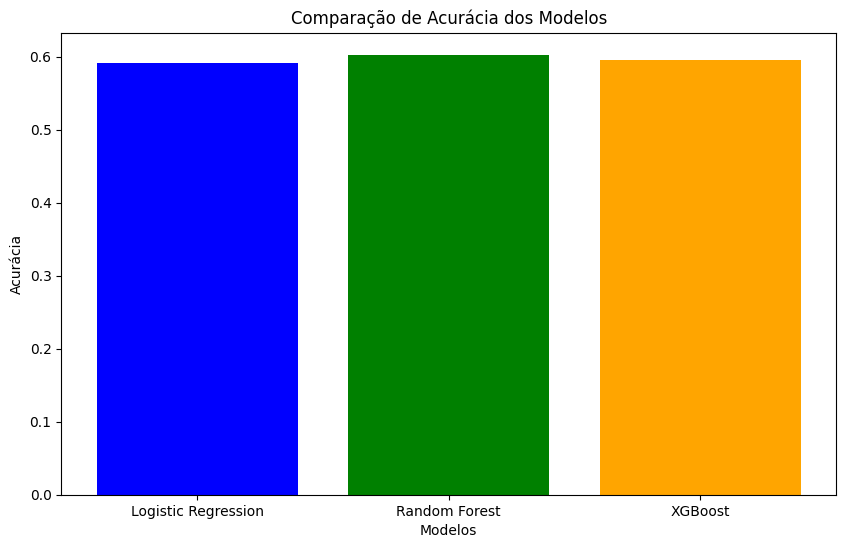

In [67]:
metrics = [resultados[model]['Accuracy'] for model in resultados]
model_names = list(resultados.keys())

plt.bar(model_names, metrics, color=['blue', 'green', 'orange'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.show()

Melhor modelo: Random Forest


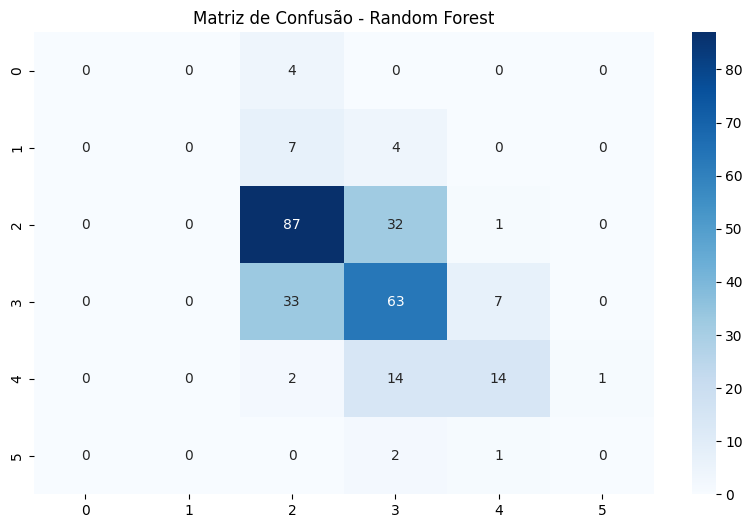

In [68]:
melhor_modelo = max(resultados, key=lambda x: resultados[x]['Accuracy'])
print(f"Melhor modelo: {melhor_modelo}")
sns.heatmap(resultados[melhor_modelo]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão - {melhor_modelo}')
plt.show()

In [71]:
def print_results():
    for model_name, result in resultados.items():
        print(f"\nModelo: {model_name}")
        print(f"Acurácia: {result['Accuracy']:.4f}")
        print("Relatório de Classificação:")
        print(result['Classification Report'])

print_results()


Modelo: Logistic Regression
Acurácia: 0.5919
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.67      0.75      0.71       120
           3       0.52      0.61      0.56       103
           4       0.53      0.26      0.35        31
           5       0.00      0.00      0.00         3

    accuracy                           0.59       272
   macro avg       0.29      0.27      0.27       272
weighted avg       0.55      0.59      0.56       272


Modelo: Random Forest
Acurácia: 0.6029
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.65      0.72      0.69       120
           3       0.55      0.61      0.58       103
           4       0.61      0.45      0.52 